In [1]:
#!/ccs/home/hzfmer/file_back/programs/anaconda3/bin/python
"""
Created on Sun Oct 1 23:57:50 2019

@author: zhh076
"""

import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import os
from os.path import dirname as up
from filter_BU import filt_B
%matplotlib inline

rcparams = {'font.size': 16,
            'xtick.labelsize': 10,
            'ytick.labelsize': 10,
            'legend.fontsize': 14,
            'axes.titlesize': 16,
            'axes.labelsize': 14,
            'lines.linewidth': 3,
            'figure.dpi': 400}
plt.rcParams.update(rcparams)

def get_stat_name(path):
    f_list = sorted(os.listdir(path))
    dname_list = []
    for ii in f_list:
        if os.path.splitext(ii)[1] == '.bbp':
            dname_list.append(ii.strip('.bbp'))
    return dname_list


      
nstat = 351
tmax = 120
nt_lg = 12000
nt_rwg = 120000
dt_lg = tmax / nt_lg
dt_rwg = tmax / nt_rwg
dir_bbp = "/ccs/home/hzfmer/scratch/high_f/data/RWG_bbp/"
dir_dyn = "/ccs/home/hzfmer/scratch/high_f/data/synthetics/"
f_rwg = 1 / dt_rwg
f_lg = 1 / dt_lg 

fx = "/ccs/home/hzfmer/scratch/high_f/la_habra_large_gpu_dm_abc50_wrongQf/seis_x0120000"
fy = "/ccs/home/hzfmer/scratch/high_f/la_habra_large_gpu_dm_abc50_wrongQf/seis_y0120000"
fz = "/ccs/home/hzfmer/scratch/high_f/la_habra_large_gpu_dm_abc50_wrongQf/seis_z0120000"
wx = np.fromfile(fx,'f').reshape(nstat, nt_lg)
wy = np.fromfile(fy,'f').reshape(nstat, nt_lg)
wz = np.fromfile(fz,'f').reshape(nstat, nt_lg)
  
fx = "/ccs/home/hzfmer/scratch/high_f/la_habra_large_gpu_dm_abc50/seis_x0120000"
fy = "/ccs/home/hzfmer/scratch/high_f/la_habra_large_gpu_dm_abc50/seis_y0120000"
fz = "/ccs/home/hzfmer/scratch/high_f/la_habra_large_gpu_dm_abc50/seis_z0120000"
qx = np.fromfile(fx,'f').reshape(nstat, nt_lg)
qy = np.fromfile(fy,'f').reshape(nstat, nt_lg)
qz = np.fromfile(fz,'f').reshape(nstat, nt_lg)

fx = "/ccs/home/hzfmer/scratch/high_f/la_habra_large_gpu_dm_abc50_noQf/seis_x0120000"
fy = "/ccs/home/hzfmer/scratch/high_f/la_habra_large_gpu_dm_abc50_noQf/seis_y0120000"
fz = "/ccs/home/hzfmer/scratch/high_f/la_habra_large_gpu_dm_abc50_noQf/seis_z0120000"
qx_0 = np.fromfile(fx,'f').reshape(nstat, nt_lg)
qy_0 = np.fromfile(fy,'f').reshape(nstat, nt_lg)
qz_0 = np.fromfile(fz,'f').reshape(nstat, nt_lg)

dname_list = get_stat_name(dir_bbp)

# for i in range(nstat):
#     print(f"Reading station {i} / {nstat}\r", end="", flush=True)
#     stat[i,:,:] = np.loadtxt(os.path.join(dir_bbp, '{0}.bbp'.format(dname_list[i]))
#                         ,dtype='float').T
rwg = np.fromfile('/ccs/home/hzfmer/scratch/high_f/data/synthetics_rwg.bin', dtype='float32').reshape((nstat, 3, nt_rwg))
t_lg = np.linspace(0, tmax, nt_lg, endpoint=False)
t_rwg = np.linspace(0, tmax, nt_rwg, endpoint=False)
    


CI_MLS


NameError: name 'q_awp' is not defined

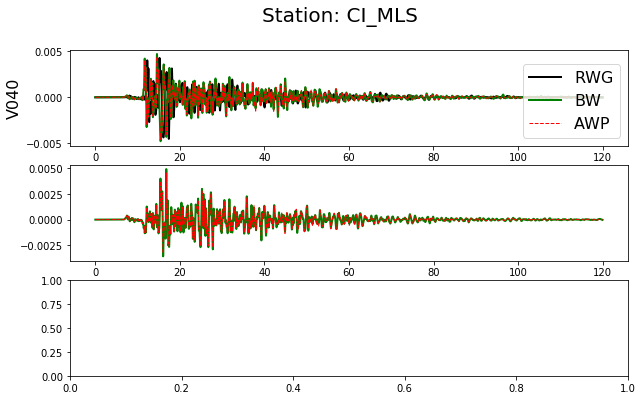

In [2]:
awp_bw = np.zeros((nstat, 3, nt_lg))
for ii in np.random.randint(nstat, size=1):
    ii = 257
    sname = dname_list[ii]
    try:
        awp_bw[ii, :, :] = np.genfromtxt(f'../data/synthetics/{sname}.dat', usecols=(1,2,3)).T
    except OSError:
        continue
    print(sname)
    v_rwg = rwg[ii, :, :]
    q_awp = np.vstack((qy[ii, :], qx[ii, :], qz[ii, :]))
    v_bw = awp_bw[ii, :, :]
    #v_rwg = filt_B(v_rwg, f_rwg, 0, 4)
    v_rwg = filt_B(v_rwg, f_rwg, 0, 4)
    v_awp = filt_B(v_awp, f_lg, 0, 4)
    v_bw = filt_B(v_bw, f_lg, 0, 4)                       
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,6))
    plt.suptitle("Station: {0}".format(sname), fontsize=20)
    ax1.plot(t_rwg, v_rwg[1, :], 'k')
    ax1.plot(t_lg, v_bw[1, :], 'g')
    ax1.plot(t_lg, v_awp[1, :], 'r', linestyle='--', linewidth=1)
    ax1.set_ylabel('V040', fontsize=16)
    ax1.legend(['RWG', 'BW', 'AWP'],loc=4, fontsize=16)
    #ax2.plot(t_rwg, v_rwg[0, :], 'k')
    ax2.plot(t_lg, v_bw[0, :], 'g')
    ax2.plot(t_lg, v_awp[0, :], 'r', linestyle='--', linewidth=1)
    ax2.plot(t_lg, q_awp[0, :], 'c', linestyle='--', linewidth=1)
    ax2.set_xlim([20, 40])
    ax2.set_ylabel('V130 (m/s)', fontsize=16)
    ax3.plot(t_rwg,v_rwg[2, :], 'k')
    #ax3.plot(t_lg, v_bw[2, :], 'g')
    ax3.plot(t_lg, v_awp[2, :], 'r', linestyle='--', linewidth=1)
    ax3.plot(t_lg, q_awp[2, :], 'c', linestyle='--', linewidth=1)
    ax3.set_xlim([20, 40])
    ax3.set_ylabel('VZ', fontsize=16)
    ax3.set_xlabel('Time (s)', fontsize=16)
    
    # filtered
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize = (10,6))
    plt.suptitle("Spectrum, Station: {0}".format(sname), fontsize=20)
    ax1.plot(np.linspace(0, f_rwg/2, int(nt_rwg/2)), 
             2 * dt_rwg * np.abs(fft(v_rwg[1, :])[0 : int(nt_rwg/2)]), 'k')
    ax1.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(v_bw[1, :])[0 : int(nt_lg/2)]), 'g', linewidth=1)
    ax1.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(v_awp[1, :])[0 : int(nt_lg/2)]), 'r', linestyle='--', linewidth=1)
    ax1.set_ylabel('V040', fontsize=16)
    ax1.legend(['RWG', 'BW', 'AWP'],loc=4, fontsize=16)
    
#     ax2.plot(np.linspace(0, f_rwg/2, int(nt_rwg/2)), 
#              2 * dt_rwg * np.abs(fft(rwg[ii, 0, :])[0 : int(nt_rwg/2)]), 'k')
    ax2.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(v_bw[0, :])[0 : int(nt_lg/2)]), 'g', linewidth=1)
    ax2.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(v_awp[0, :])[0 : int(nt_lg/2)]), 'r', linestyle='--', linewidth=1)
    ax2.set_ylabel('V130', fontsize=16)
    
    ax3.plot(np.linspace(0, f_rwg/2, int(nt_rwg/2)), 
             2 * dt_rwg * np.abs(fft(v_rwg[2, :])[0 : int(nt_rwg/2)]), 'k')
#     ax3.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
#              2 * dt_lg * np.abs(fft(awp_bw[ii, 2, :])[0 : int(nt_lg/2)]), 'g', linewidth=1)
    ax3.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(v_awp[2, :])[0 : int(nt_lg/2)]), 'r', linestyle='--', linewidth=1)
    ax3.set_ylabel('VZ', fontsize=16)
    ax3.set_xlabel('Frequency (Hz)', fontsize=16)
    plt.xlim([0, 5])
    
    # filter
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize = (10,6))
    plt.suptitle("Spectrum, Station: {0}".format(sname), fontsize=20)
    ax1.plot(np.linspace(0, f_rwg/2, int(nt_rwg/2)), 
             2 * dt_rwg * np.abs(fft(rwg[ii, 1, :])[0 : int(nt_rwg/2)]), 'k')
    ax1.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(awp_bw[ii, 1, :])[0 : int(nt_lg/2)]), 'g', linewidth=1)
    ax1.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(qx[ii, :])[0 : int(nt_lg/2)]), 'r', linestyle='--', linewidth=1)
    ax1.set_ylabel('V040', fontsize=16)
    ax1.legend(['RWG', 'BW', 'AWP'],loc=4, fontsize=16)
    
#     ax2.plot(np.linspace(0, f_rwg/2, int(nt_rwg/2)), 
#              2 * dt_rwg * np.abs(fft(rwg[ii, 0, :])[0 : int(nt_rwg/2)]), 'k')
    ax2.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(awp_bw[ii, 0, :])[0 : int(nt_lg/2)]), 'g', linewidth=1)
    ax2.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(qy[ii, :])[0 : int(nt_lg/2)]), 'r', linestyle='--', linewidth=1)
    ax2.set_ylabel('V130', fontsize=16)
    
    ax3.plot(np.linspace(0, f_rwg/2, int(nt_rwg/2)), 
             2 * dt_rwg * np.abs(fft(rwg[ii, 2, :])[0 : int(nt_rwg/2)]), 'k')
#     ax3.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
#              2 * dt_lg * np.abs(fft(awp_bw[ii, 2, :])[0 : int(nt_lg/2)]), 'g', linewidth=1)
    ax3.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(qz[ii, :])[0 : int(nt_lg/2)]), 'r', linestyle='--', linewidth=1)
    ax3.set_ylabel('VZ', fontsize=16)
    ax3.set_xlabel('Frequency (Hz)', fontsize=16)
    
    plt.xlim([0, 5])
    plt.show()

In [103]:
rwg2.astype('float32').tofile('/ccs/home/hzfmer/scratch/high_f/data/synthetics_rwg.bin')

ii =  170 ; site name =  CE_24260


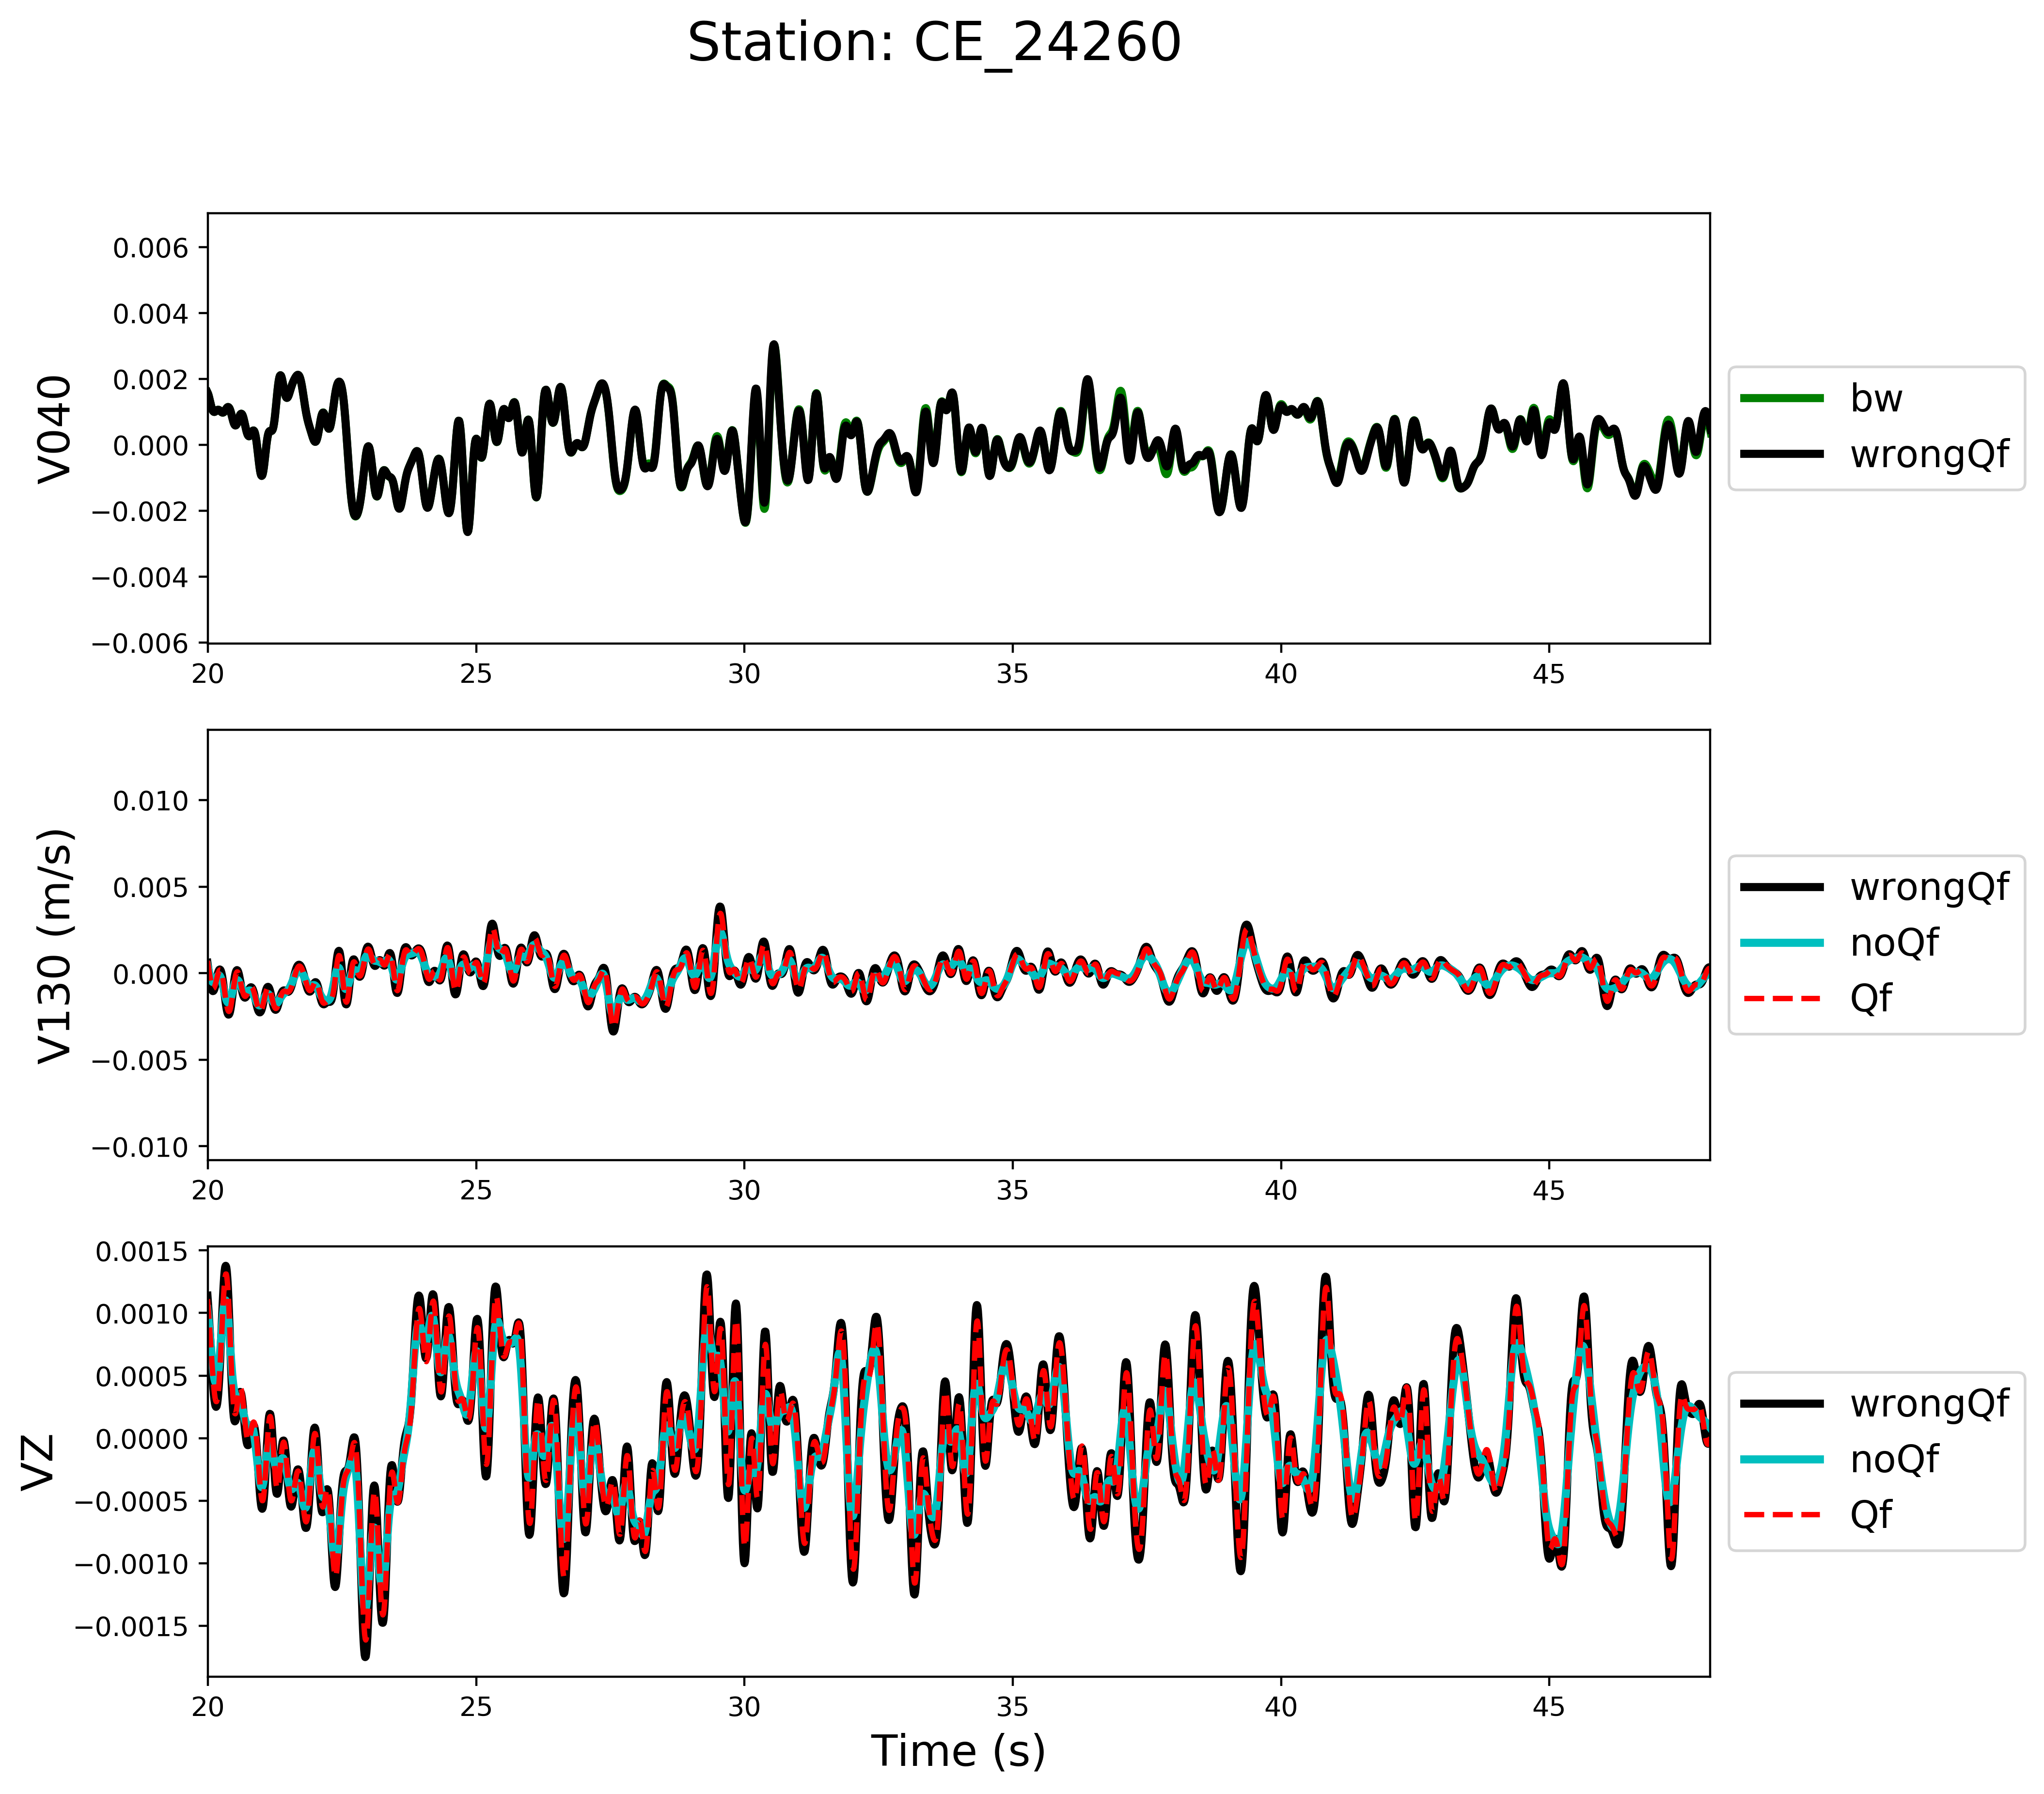

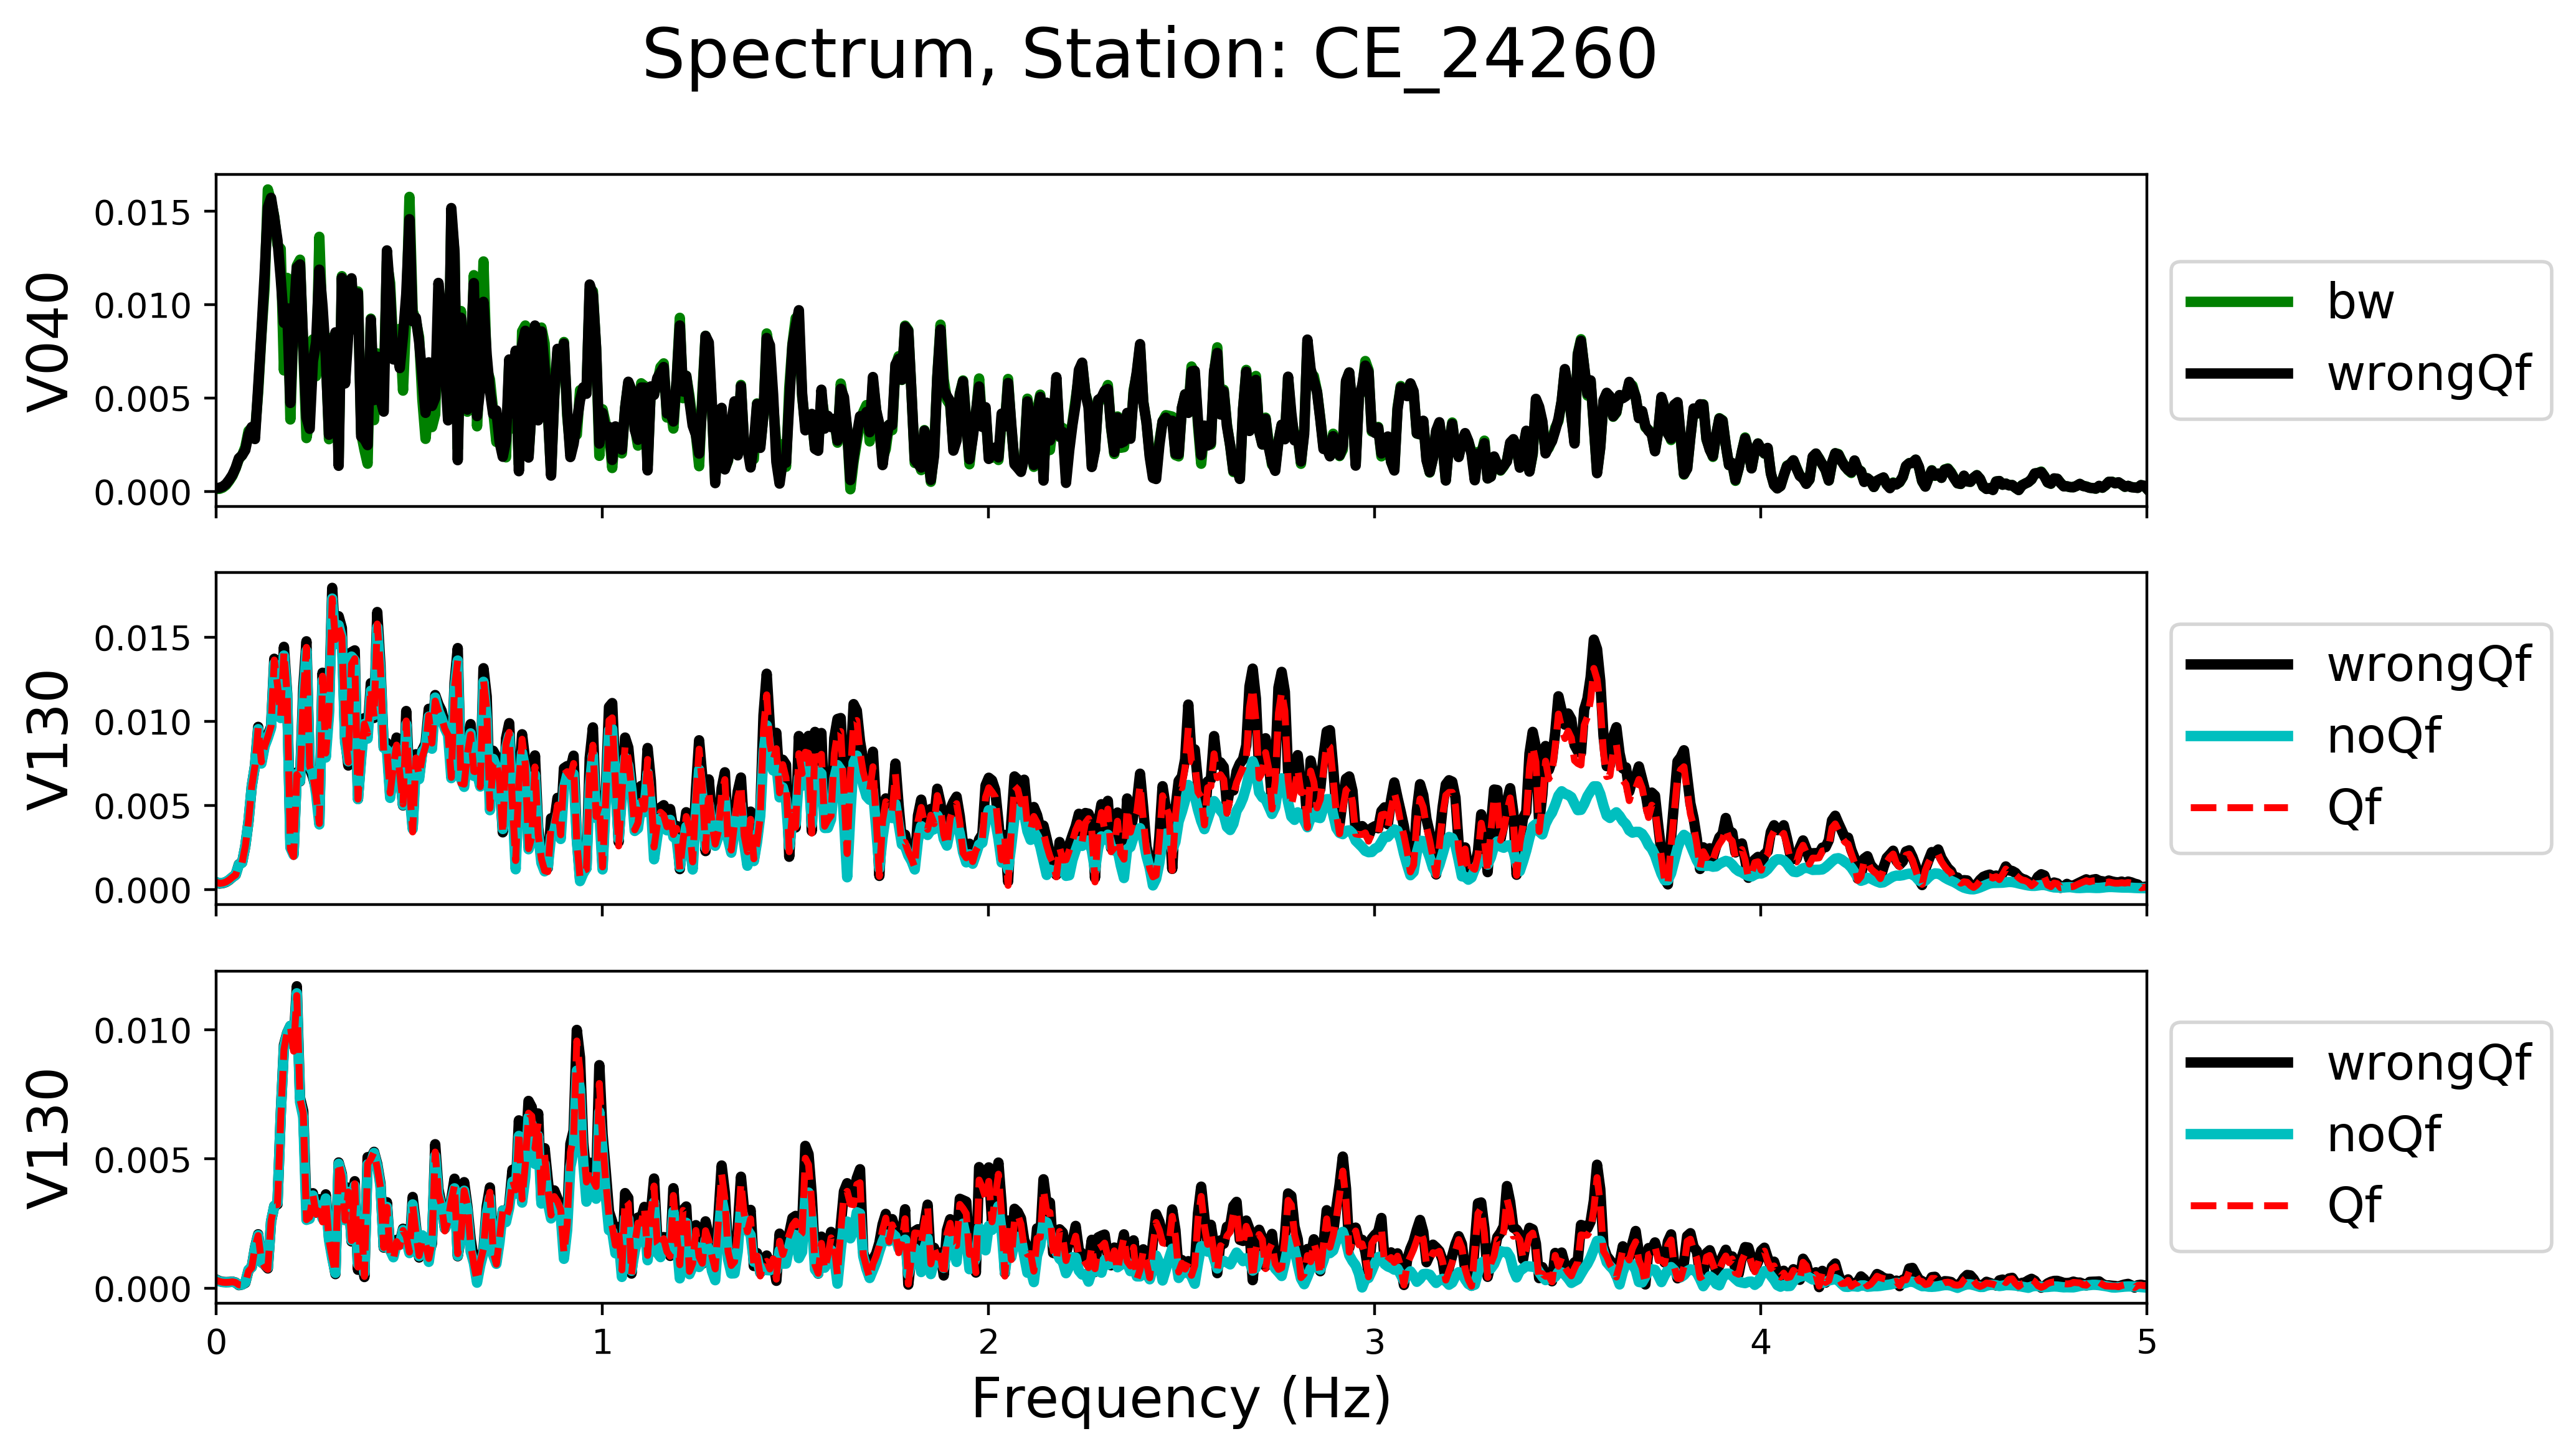

In [63]:
awp_bw = np.zeros((nstat, 3, nt_lg))
for ii in np.random.randint(nstat, size=1):
    #ii = 315
    llim, rlim = 20, 48
    sname = dname_list[ii]
    try:
        awp_bw[ii, :, :] = np.genfromtxt(f'../data/synthetics/{sname}.dat', usecols=(1,2,3)).T
    except OSError:
        continue
    print("ii = ", ii, "; site name = ", sname)
    v_rwg = rwg[ii, :, :]
    v_bw = awp_bw[ii, :, :]
    w_awp = np.vstack((wy[ii, :], wx[ii, :], wz[ii, :]))
    q_awp = np.vstack((qy[ii, :], qx[ii, :], qz[ii, :]))
    q0_awp = np.vstack((qy_0[ii, :], qx_0[ii, :], qz_0[ii, :]))
    #v_rwg = filt_B(v_rwg, f_rwg, 0, 4)
    v_rwg = filt_B(v_rwg, f_rwg, 0, 4)
    v_bw = filt_B(v_bw, f_lg, 0, 4)
    w_awp = filt_B(w_awp, f_lg, 0, 4)
    q_awp = filt_B(q_awp, f_lg, 0, 4)
    q0_awp = filt_B(q0_awp, f_lg, 0, 4)                     
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,10))
    plt.suptitle("Station: {0}".format(sname), fontsize=20)
    ax1.plot(t_lg, v_bw[1, :], 'g')
    ax1.plot(t_lg, w_awp[1, :], 'k')
    #ax1.plot(t_lg, q0_awp[1, :], 'c')
    #ax1.plot(t_lg, q_awp[1, :], 'r--', linewidth=2)
    ax1.set_xlim([llim, rlim])
    ax1.set_ylabel('V040', fontsize=16)
    ax1.legend(['bw', 'wrongQf', 'noQf', 'Qf'], bbox_to_anchor=(1, 0.5),
              loc = 'center left')
    #ax2.plot(t_lg, v_bw[0, :], 'g')
    ax2.plot(t_lg, w_awp[0, :], 'k')
    ax2.plot(t_lg, q0_awp[0, :], 'c')
    ax2.plot(t_lg, q_awp[0, :], 'r--', linewidth=2)
    ax2.set_xlim([llim, rlim])
    ax2.set_ylabel('V130 (m/s)', fontsize=16)
    ax2.legend(['wrongQf','noQf', 'Qf'], bbox_to_anchor=(1, 0.5),
              loc = 'center left')
    
    #ax3.plot(t_lg,v_bw[2, :], 'g')
    ax3.plot(t_lg, w_awp[2, :], 'k')
    ax3.plot(t_lg, q0_awp[2, :], 'c')
    ax3.plot(t_lg, q_awp[2, :], 'r--', linewidth=2)
    ax3.set_xlim([llim, rlim])
    ax3.set_ylabel('VZ', fontsize=16)
    ax3.legend(['wrongQf', 'noQf', 'Qf'], bbox_to_anchor=(1, 0.5),
              loc = 'center left')
    ax3.set_xlabel('Time (s)', fontsize=16)
    fig.savefig(f"compare_Qf_timeseries.png", dpi=600, bbox_inches='tight', pad_inches=0.05)

    # filtered
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize = (10,6))
    plt.suptitle("Spectrum, Station: {0}".format(sname), fontsize=20)
    ax1.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(v_bw[1, :])[0 : int(nt_lg/2)]), 'g')
    ax1.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(w_awp[1, :])[0 : int(nt_lg/2)]), 'k')
    ax1.set_ylabel('V040', fontsize=16)
    ax1.legend(['bw', 'wrongQf'], bbox_to_anchor=(1, 0.5),
              loc = 'center left')
    

    ax2.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(w_awp[0, :])[0 : int(nt_lg/2)]), 'k')
    ax2.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(q0_awp[0, :])[0 : int(nt_lg/2)]), 'c')
    ax2.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(q_awp[0, :])[0 : int(nt_lg/2)]), 'r--', linewidth=2)
    ax2.set_ylabel('V130', fontsize=16)
    ax2.legend(['wrongQf','noQf', 'Qf'], bbox_to_anchor=(1, 0.5),
              loc = 'center left')
    
    ax3.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(w_awp[2, :])[0 : int(nt_lg/2)]), 'k')
    ax3.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(q0_awp[2, :])[0 : int(nt_lg/2)]), 'c')
    ax3.plot(np.linspace(0, f_lg/2, int(nt_lg/2)), 
             2 * dt_lg * np.abs(fft(q_awp[2, :])[0 : int(nt_lg/2)]), 'r--', linewidth=2)
    ax3.set_ylabel('V130', fontsize=16)
    ax3.set_xlabel('Frequency (Hz)', fontsize=16)
    ax3.legend(['wrongQf','noQf', 'Qf'], bbox_to_anchor=(1, 0.5),
              loc = 'center left')
    
    plt.xlim([0, 5])
    fig.savefig(f"compare_Qf_fft.png", dpi=600, bbox_inches='tight', pad_inches=0.05)

    